# 0.Dependencies

In [1]:
!pip install stable_baselines3

In [2]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch NASDAQ Data 

In [3]:
df = pd.read_csv('C:\\Users\\amerb\\Downloads\\^IXIC.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-03-01,3143.540039,3171.500000,3129.399902,3169.739990,3169.739990,1870250000
1,2013-03-04,3159.459961,3182.270020,3154.790039,3182.030029,3182.030029,1718290000
2,2013-03-05,3200.379883,3227.310059,3200.270020,3224.129883,3224.129883,1891510000
3,2013-03-06,3233.310059,3233.439941,3217.669922,3222.370117,3222.370117,1764020000
4,2013-03-07,3224.500000,3235.100098,3221.469971,3232.090088,3232.090088,1675640000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-03-01,3143.540039,3171.500000,3129.399902,3169.739990,3169.739990,1870250000
1,2013-03-04,3159.459961,3182.270020,3154.790039,3182.030029,3182.030029,1718290000
2,2013-03-05,3200.379883,3227.310059,3200.270020,3224.129883,3224.129883,1891510000
3,2013-03-06,3233.310059,3233.439941,3217.669922,3222.370117,3222.370117,1764020000
4,2013-03-07,3224.500000,3235.100098,3221.469971,3232.090088,3232.090088,1675640000


In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-01,3143.540039,3171.500000,3129.399902,3169.739990,3169.739990,1870250000
2013-03-04,3159.459961,3182.270020,3154.790039,3182.030029,3182.030029,1718290000
2013-03-05,3200.379883,3227.310059,3200.270020,3224.129883,3224.129883,1891510000
2013-03-06,3233.310059,3233.439941,3217.669922,3222.370117,3222.370117,1764020000
2013-03-07,3224.500000,3235.100098,3221.469971,3232.090088,3232.090088,1675640000


In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [9]:
env.signal_features

C:\Users\amerb\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 3.1697400e+03,  0.0000000e+00],
       [ 3.1820300e+03,  1.2290039e+01],
       [ 3.2241299e+03,  4.2099854e+01],
       [ 3.2223701e+03, -1.7597660e+00],
       [ 3.2320901e+03,  9.7199707e+00],
       [ 3.2443701e+03,  1.2280029e+01],
       [ 3.2528701e+03,  8.5000000e+00],
       [ 3.2423201e+03, -1.0550049e+01],
       [ 3.2451201e+03,  2.8000491e+00],
       [ 3.2589299e+03,  1.3809815e+01],
       [ 3.2490701e+03, -9.8598642e+00],
       [ 3.2375901e+03, -1.1479980e+01],
       [ 3.2291001e+03, -8.4899902e+00],
       [ 3.2541899e+03,  2.5089844e+01],
       [ 3.2226001e+03, -3.1589844e+01],
       [ 3.2450000e+03,  2.2399902e+01],
       [ 3.2353000e+03, -9.6999512e+00],
       [ 3.2524800e+03,  1.7179932e+01],
       [ 3.2565200e+03,  4.0400400e+00],
       [ 3.2675200e+03,  1.1000000e+01],
       [ 3.2391699e+03, -2.8350098e+01],
       [ 3.2548601e+03,  1.5690185e+01],
       [ 3.2186001e+03, -3.6260010e+01],
       [ 3.2249800e+03,  6.3798819e+00],
       [ 3.20386

# 2. Build Environment

In [10]:
env.action_space

Discrete(2)

info {'total_reward': 723.279052734375, 'total_profit': 0.4911648571677466, 'position': <Positions.Short: 0>}


C:\Users\amerb\anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


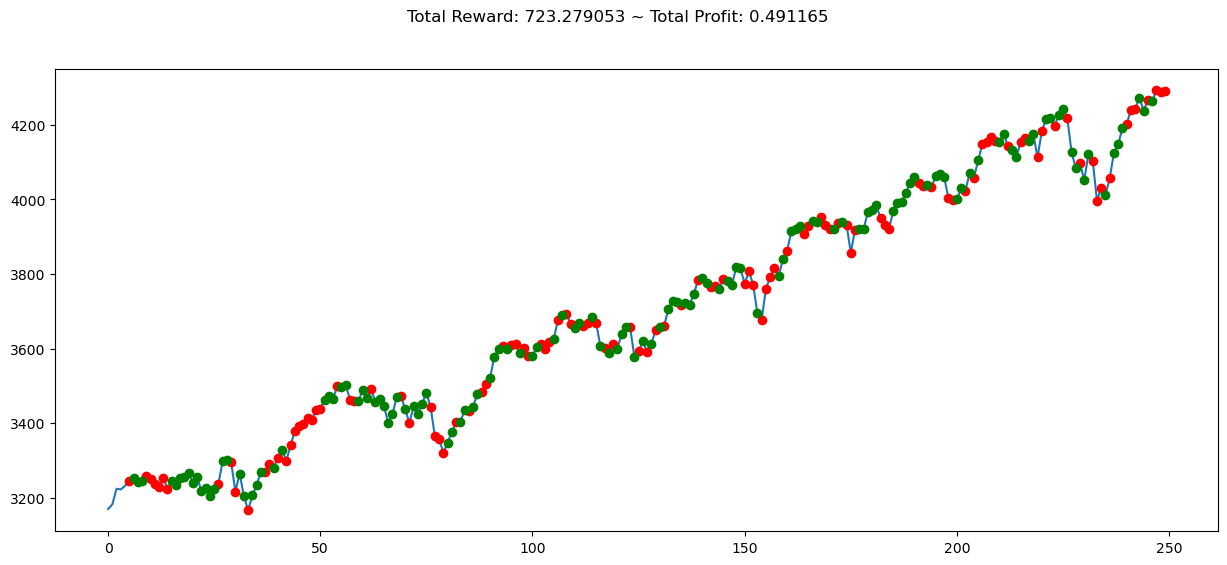

In [11]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, a,b,info = env.step(action)
    done= a or b
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Financial Indicators

In [12]:
!pip install finta

In [13]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [14]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## 2.1.3. Adding SMA, RSI and OBV

In [15]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [16]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2013-03-01,3143.540039,3171.500000,3129.399902,3169.739990,3169.739990,1870250000,0.000000,0.000000,0.000000e+00
2013-03-04,3159.459961,3182.270020,3154.790039,3182.030029,3182.030029,1718290000,0.000000,100.000000,1.718290e+09
2013-03-05,3200.379883,3227.310059,3200.270020,3224.129883,3224.129883,1891510000,0.000000,100.000000,3.609800e+09
2013-03-06,3233.310059,3233.439941,3217.669922,3222.370117,3222.370117,1764020000,0.000000,96.579625,1.845780e+09
2013-03-07,3224.500000,3235.100098,3221.469971,3232.090088,3232.090088,1675640000,0.000000,97.157871,3.521420e+09
2013-03-08,3245.850098,3248.699951,3227.889893,3244.370117,3244.370117,1611700000,0.000000,97.689356,5.133120e+09
2013-03-11,3237.739990,3252.870117,3233.669922,3252.870117,3252.870117,1628500000,0.000000,97.972045,6.761620e+09
2013-03-12,3244.850098,3249.780029,3229.919922,3242.320068,3242.320068,1673740000,0.000000,84.202445,5.087880e+09
2013-03-13,3243.040039,3251.449951,3230.620117,3245.120117,3245.120117,1577280000,0.000000,84.812544,6.665160e+09


## 2.1.4. Create New Environments With financial Metrics

In [17]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [18]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [19]:
env2.signal_features

array([[3.12939990e+03, 1.87025000e+09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.15479004e+03, 1.71829000e+09, 0.00000000e+00, 1.00000000e+02,
        1.71829000e+09],
       [3.20027002e+03, 1.89151000e+09, 0.00000000e+00, 1.00000000e+02,
        3.60980000e+09],
       [3.21766992e+03, 1.76402000e+09, 0.00000000e+00, 9.65796254e+01,
        1.84578000e+09],
       [3.22146997e+03, 1.67564000e+09, 0.00000000e+00, 9.71578708e+01,
        3.52142000e+09],
       [3.22788989e+03, 1.61170000e+09, 0.00000000e+00, 9.76893555e+01,
        5.13312000e+09],
       [3.23366992e+03, 1.62850000e+09, 0.00000000e+00, 9.79720449e+01,
        6.76162000e+09],
       [3.22991992e+03, 1.67374000e+09, 0.00000000e+00, 8.42024451e+01,
        5.08788000e+09],
       [3.23062012e+03, 1.57728000e+09, 0.00000000e+00, 8.48125437e+01,
        6.66516000e+09],
       [3.25023999e+03, 1.65165000e+09, 0.00000000e+00, 8.73976016e+01,
        8.31681000e+09],
       [3.24264990e+03, 2.3052

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2013-03-01,3143.540039,3171.500000,3129.399902,3169.739990,3169.739990,1870250000,0.0,0.000000,0.000000e+00
2013-03-04,3159.459961,3182.270020,3154.790039,3182.030029,3182.030029,1718290000,0.0,100.000000,1.718290e+09
2013-03-05,3200.379883,3227.310059,3200.270020,3224.129883,3224.129883,1891510000,0.0,100.000000,3.609800e+09
2013-03-06,3233.310059,3233.439941,3217.669922,3222.370117,3222.370117,1764020000,0.0,96.579625,1.845780e+09
2013-03-07,3224.500000,3235.100098,3221.469971,3232.090088,3232.090088,1675640000,0.0,97.157871,3.521420e+09


# 3. Build Environment and Train

In [21]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [22]:
model = PPO('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2058 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1340         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0097035095 |
|    clip_fraction        | 0.0382       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.00183      |
|    learning_rate        | 0.0003       |
|    loss                 | 848          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0102      |
|    value_loss           | 2.16e+03     |
------------------------------------------

------------------------------------------
| time/                   |              |
|    fps                  | 1077         |
|    iterations           | 13           |
|    time_elapsed         | 24           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0025447155 |
|    clip_fraction        | 0.0253       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.423       |
|    explained_variance   | -2.13e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 4.27e+03     |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00446     |
|    value_loss           | 1.01e+04     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1079         |
|    iterations           | 14           |
|    time_elapsed         | 26           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1057         |
|    iterations           | 24           |
|    time_elapsed         | 46           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0021638637 |
|    clip_fraction        | 0.0356       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.299       |
|    explained_variance   | -4.17e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 4.35e+03     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00184     |
|    value_loss           | 1.12e+04     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1054         |
|    iterations           | 25           |
|    time_elapsed         | 48           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1052         |
|    iterations           | 35           |
|    time_elapsed         | 68           |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0028441339 |
|    clip_fraction        | 0.024        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.256       |
|    explained_variance   | -1.07e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 4.71e+03     |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 1.08e+04     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1052        |
|    iterations           | 36          |
|    time_elapsed         | 70          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 1040         |
|    iterations           | 46           |
|    time_elapsed         | 90           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0010277531 |
|    clip_fraction        | 0.0165       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.234       |
|    explained_variance   | -4.77e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 4.12e+03     |
|    n_updates            | 450          |
|    policy_gradient_loss | 0.000126     |
|    value_loss           | 1.03e+04     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1040         |
|    iterations           | 47           |
|    time_elapsed         | 92           |
|    total_

# 4. Evaluation

In [28]:
import numpy as np

env = MyCustomEnv(df=df, window_size=12, frame_bound=(80, 250))
obs = env.reset()

while True:
    if isinstance(obs, tuple):
        obs_array = obs[0]
    else:
        obs_array = obs

    print("Observation shape:", obs_array.shape)  # Print the observation shape

    # Ensure the observation array is in the correct shape (12, 5)
    if obs_array.shape != (12, 5):
        obs_array = obs_array.reshape((12, 5))

    print("Observation shape after reshape:", obs_array.shape)  # Print the observation shape after reshaping

    # Add a batch dimension if needed
    obs_array_batch = obs_array[np.newaxis, ...]

    print("Observation shape with batch dimension:", obs_array_batch.shape)  # Print the shape with batch dimension

    # Predict the action using the model
    action, _states = model.predict(obs_array_batch)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    

    if done:
        print("info", info)
        break


Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape: (12, 5)
Observation shape aft

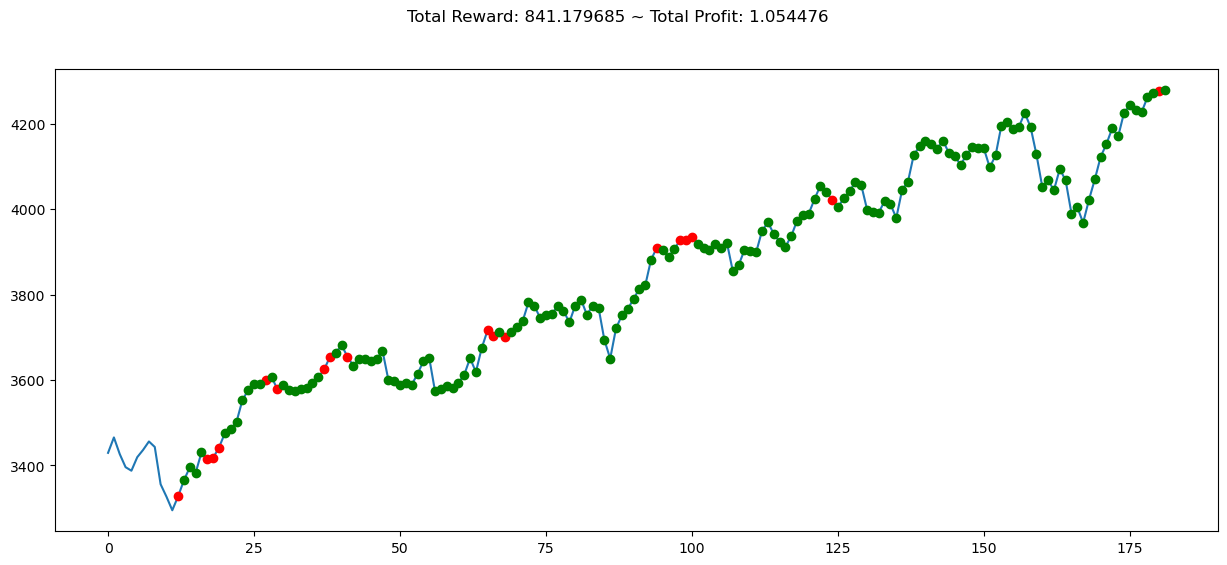

In [29]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# A2C Model 

In [31]:
model2 = A2C('MlpPolicy', env, verbose=1) 
model2.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 438      |
| time/                 |          |
|    fps                | 900      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.655   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8.56    |
|    value_loss         | 284      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 528      |
| time/                 |          |
|    fps                | 854      |
|    iterations         | 200      |
|    time_elapsed 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 490      |
| time/                 |          |
|    fps                | 834      |
|    iterations         | 1400     |
|    time_elapsed       | 8        |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.677   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -8.68    |
|    value_loss         | 339      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 494      |
| time/                 |          |
|    fps                | 838      |
|    iterations         | 1500     |
|    time_elapsed       | 8        |
|    total_timesteps    | 7500     |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 169       |
|    ep_rew_mean        | 537       |
| time/                 |           |
|    fps                | 872       |
|    iterations         | 2800      |
|    time_elapsed       | 16        |
|    total_timesteps    | 14000     |
| train/                |           |
|    entropy_loss       | -0.565    |
|    explained_variance | -4.77e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 2799      |
|    policy_loss        | 11.1      |
|    value_loss         | 1.3e+03   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 541      |
| time/                 |          |
|    fps                | 874      |
|    iterations         | 2900     |
|    time_elapsed       | 16       |
|    total_timesteps    | 14500    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 169       |
|    ep_rew_mean        | 605       |
| time/                 |           |
|    fps                | 863       |
|    iterations         | 4100      |
|    time_elapsed       | 23        |
|    total_timesteps    | 20500     |
| train/                |           |
|    entropy_loss       | -0.398    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4099      |
|    policy_loss        | -24.2     |
|    value_loss         | 1.04e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 612      |
| time/                 |          |
|    fps                | 865      |
|    iterations         | 4200     |
|    time_elapsed       | 24       |
|    total_timesteps    | 21000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 666      |
| time/                 |          |
|    fps                | 876      |
|    iterations         | 5400     |
|    time_elapsed       | 30       |
|    total_timesteps    | 27000    |
| train/                |          |
|    entropy_loss       | -0.284   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5399     |
|    policy_loss        | 0.431    |
|    value_loss         | 129      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 673      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 5500     |
|    time_elapsed       | 31       |
|    total_timesteps    | 27500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 715      |
| time/                 |          |
|    fps                | 873      |
|    iterations         | 6800     |
|    time_elapsed       | 38       |
|    total_timesteps    | 34000    |
| train/                |          |
|    entropy_loss       | -0.118   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6799     |
|    policy_loss        | 0.0555   |
|    value_loss         | 204      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 711      |
| time/                 |          |
|    fps                | 873      |
|    iterations         | 6900     |
|    time_elapsed       | 39       |
|    total_timesteps    | 34500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 731      |
| time/                 |          |
|    fps                | 878      |
|    iterations         | 8100     |
|    time_elapsed       | 46       |
|    total_timesteps    | 40500    |
| train/                |          |
|    entropy_loss       | -0.2     |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 8099     |
|    policy_loss        | -2.47    |
|    value_loss         | 1.36e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 730      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 8200     |
|    time_elapsed       | 46       |
|    total_timesteps    | 41000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 758      |
| time/                 |          |
|    fps                | 873      |
|    iterations         | 9500     |
|    time_elapsed       | 54       |
|    total_timesteps    | 47500    |
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | 4.83e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9499     |
|    policy_loss        | -0.778   |
|    value_loss         | 133      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 764      |
| time/                 |          |
|    fps                | 873      |
|    iterations         | 9600     |
|    time_elapsed       | 54       |
|    total_timesteps    | 48000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 766      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 10800    |
|    time_elapsed       | 61       |
|    total_timesteps    | 54000    |
| train/                |          |
|    entropy_loss       | -0.0144  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 10799    |
|    policy_loss        | -0.00644 |
|    value_loss         | 12.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 761      |
| time/                 |          |
|    fps                | 878      |
|    iterations         | 10900    |
|    time_elapsed       | 62       |
|    total_timesteps    | 54500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 759      |
| time/                 |          |
|    fps                | 876      |
|    iterations         | 12100    |
|    time_elapsed       | 69       |
|    total_timesteps    | 60500    |
| train/                |          |
|    entropy_loss       | -0.147   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12099    |
|    policy_loss        | -0.045   |
|    value_loss         | 978      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 764      |
| time/                 |          |
|    fps                | 875      |
|    iterations         | 12200    |
|    time_elapsed       | 69       |
|    total_timesteps    | 61000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 761      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 13400    |
|    time_elapsed       | 76       |
|    total_timesteps    | 67000    |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 13399    |
|    policy_loss        | -3.45    |
|    value_loss         | 20.4     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 762      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 13500    |
|    time_elapsed       | 76       |
|    total_timesteps    | 67500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 778      |
| time/                 |          |
|    fps                | 876      |
|    iterations         | 14700    |
|    time_elapsed       | 83       |
|    total_timesteps    | 73500    |
| train/                |          |
|    entropy_loss       | -0.0247  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 14699    |
|    policy_loss        | -0.247   |
|    value_loss         | 4.25e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 779      |
| time/                 |          |
|    fps                | 875      |
|    iterations         | 14800    |
|    time_elapsed       | 84       |
|    total_timesteps    | 74000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 786      |
| time/                 |          |
|    fps                | 874      |
|    iterations         | 16100    |
|    time_elapsed       | 92       |
|    total_timesteps    | 80500    |
| train/                |          |
|    entropy_loss       | -0.164   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 16099    |
|    policy_loss        | -0.58    |
|    value_loss         | 86.1     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 786      |
| time/                 |          |
|    fps                | 875      |
|    iterations         | 16200    |
|    time_elapsed       | 92       |
|    total_timesteps    | 81000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 777      |
| time/                 |          |
|    fps                | 874      |
|    iterations         | 17400    |
|    time_elapsed       | 99       |
|    total_timesteps    | 87000    |
| train/                |          |
|    entropy_loss       | -0.0148  |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17399    |
|    policy_loss        | 0.146    |
|    value_loss         | 2.92e+03 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 776      |
| time/                 |          |
|    fps                | 873      |
|    iterations         | 17500    |
|    time_elapsed       | 100      |
|    total_timesteps    | 87500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 770      |
| time/                 |          |
|    fps                | 875      |
|    iterations         | 18700    |
|    time_elapsed       | 106      |
|    total_timesteps    | 93500    |
| train/                |          |
|    entropy_loss       | -0.128   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 18699    |
|    policy_loss        | -0.443   |
|    value_loss         | 32.1     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 770      |
| time/                 |          |
|    fps                | 875      |
|    iterations         | 18800    |
|    time_elapsed       | 107      |
|    total_timesteps    | 94000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 169      |
|    ep_rew_mean        | 775      |
| time/                 |          |
|    fps                | 877      |
|    iterations         | 20000    |
|    time_elapsed       | 113      |
|    total_timesteps    | 100000   |
| train/                |          |
|    entropy_loss       | -0.00145 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 19999    |
|    policy_loss        | 0.00445  |
|    value_loss         | 709      |
------------------------------------


In [32]:
import numpy as np

env = MyCustomEnv(df=df, window_size=12, frame_bound=(80, 250))
obs = env.reset()

while True:
    if isinstance(obs, tuple):
        obs_array = obs[0]
    else:
        obs_array = obs
  # Print the observation shape

    # Ensure the observation array is in the correct shape (12, 5)
    if obs_array.shape != (12, 5):
        obs_array = obs_array.reshape((12, 5))

    print("Observation shape after reshape:", obs_array.shape)  # Print the observation shape after reshaping

    # Add a batch dimension if needed
    obs_array_batch = obs_array[np.newaxis, ...]

    print("Observation shape with batch dimension:", obs_array_batch.shape)  # Print the shape with batch dimension

    # Predict the action using the model
    action, _states = model2.predict(obs_array_batch)
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    

    if done:
        print("info", info)
        break


Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension: (1, 12, 5)
Observation shape after reshape: (12, 5)
Observation shape with batch dimension:

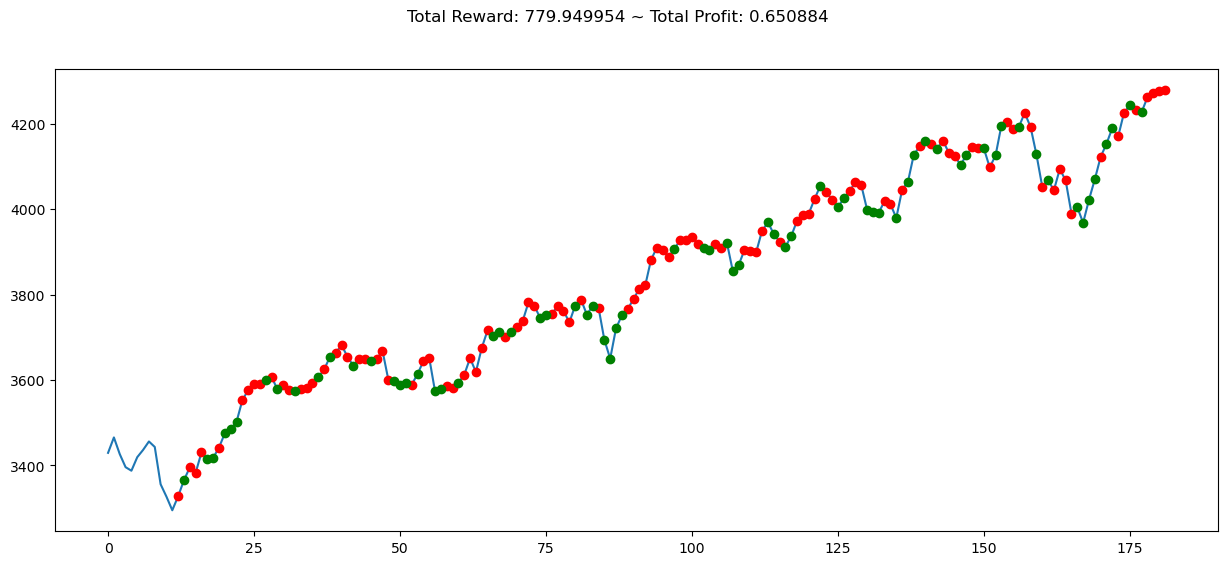

In [33]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2162 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1380        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017072346 |
|    clip_fraction        | 0.0712      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | -0.00118    |
|    learning_rate        | 0.0003      |
|    loss                 | 1.28e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00729    |
|    value_loss           | 3.02e+03    |
-----------------------------------------
-----------------

------------------------------------------
| time/                   |              |
|    fps                  | 1074         |
|    iterations           | 13           |
|    time_elapsed         | 24           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0011000781 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.491       |
|    explained_variance   | -8.11e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.07e+03     |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00125     |
|    value_loss           | 5.16e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1070         |
|    iterations           | 14           |
|    time_elapsed         | 26           |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 1045         |
|    iterations           | 24           |
|    time_elapsed         | 47           |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0043788906 |
|    clip_fraction        | 0.0189       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.411       |
|    explained_variance   | -1.55e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 2.17e+03     |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00151     |
|    value_loss           | 5.22e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1045         |
|    iterations           | 25           |
|    time_elapsed         | 48           |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 1033          |
|    iterations           | 35            |
|    time_elapsed         | 69            |
|    total_timesteps      | 71680         |
| train/                  |               |
|    approx_kl            | 0.00075221615 |
|    clip_fraction        | 0.0121        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.391        |
|    explained_variance   | -3.58e-07     |
|    learning_rate        | 0.0003        |
|    loss                 | 1.96e+03      |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000338     |
|    value_loss           | 3.42e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1029         |
|    iterations           | 36           |
|    time_elapsed         | 71      

------------------------------------------
| time/                   |              |
|    fps                  | 1028         |
|    iterations           | 46           |
|    time_elapsed         | 91           |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0016075138 |
|    clip_fraction        | 0.0214       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | -3.58e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 944          |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000377    |
|    value_loss           | 2.67e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1028         |
|    iterations           | 47           |
|    time_elapsed         | 93           |
|    total_

------------------------------------
| time/                 |          |
|    fps                | 802      |
|    iterations         | 1100     |
|    time_elapsed       | 6        |
|    total_timesteps    | 5500     |
| train/                |          |
|    entropy_loss       | -0.67    |
|    explained_variance | 6.46e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1099     |
|    policy_loss        | 8.24     |
|    value_loss         | 257      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 793      |
|    iterations         | 1200     |
|    time_elapsed       | 7        |
|    total_timesteps    | 6000     |
| train/                |          |
|    entropy_loss       | -0.667   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 1199     |
|    policy_loss        | 5.44     |
|    value_loss         | 175      |
-

------------------------------------
| time/                 |          |
|    fps                | 815      |
|    iterations         | 2700     |
|    time_elapsed       | 16       |
|    total_timesteps    | 13500    |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | -1.1e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | -0.44    |
|    value_loss         | 0.492    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 818      |
|    iterations         | 2800     |
|    time_elapsed       | 17       |
|    total_timesteps    | 14000    |
| train/                |          |
|    entropy_loss       | -0.681   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | 6.32     |
|    value_loss         | 194      |
-

------------------------------------
| time/                 |          |
|    fps                | 829      |
|    iterations         | 4300     |
|    time_elapsed       | 25       |
|    total_timesteps    | 21500    |
| train/                |          |
|    entropy_loss       | -0.633   |
|    explained_variance | 8.94e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 4299     |
|    policy_loss        | -28.3    |
|    value_loss         | 1.41e+03 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 828       |
|    iterations         | 4400      |
|    time_elapsed       | 26        |
|    total_timesteps    | 22000     |
| train/                |           |
|    entropy_loss       | -0.668    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4399      |
|    policy_loss        | -0.0473   |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 847       |
|    iterations         | 5900      |
|    time_elapsed       | 34        |
|    total_timesteps    | 29500     |
| train/                |           |
|    entropy_loss       | -0.684    |
|    explained_variance | -4.65e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 5899      |
|    policy_loss        | 2.98      |
|    value_loss         | 28.7      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 848      |
|    iterations         | 6000     |
|    time_elapsed       | 35       |
|    total_timesteps    | 30000    |
| train/                |          |
|    entropy_loss       | -0.683   |
|    explained_variance | 1.67e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 5999     |
|    policy_loss        | 74.8     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 846      |
|    iterations         | 7500     |
|    time_elapsed       | 44       |
|    total_timesteps    | 37500    |
| train/                |          |
|    entropy_loss       | -0.636   |
|    explained_variance | 2.92e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7499     |
|    policy_loss        | 0.72     |
|    value_loss         | 9.84     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 847      |
|    iterations         | 7600     |
|    time_elapsed       | 44       |
|    total_timesteps    | 38000    |
| train/                |          |
|    entropy_loss       | -0.558   |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 7599     |
|    policy_loss        | 5.84     |
|    value_loss         | 608      |
-

------------------------------------
| time/                 |          |
|    fps                | 856      |
|    iterations         | 9100     |
|    time_elapsed       | 53       |
|    total_timesteps    | 45500    |
| train/                |          |
|    entropy_loss       | -0.644   |
|    explained_variance | 5.07e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9099     |
|    policy_loss        | -3.65    |
|    value_loss         | 30.8     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 857      |
|    iterations         | 9200     |
|    time_elapsed       | 53       |
|    total_timesteps    | 46000    |
| train/                |          |
|    entropy_loss       | -0.609   |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 9199     |
|    policy_loss        | 32.4     |
|    value_loss         | 2.7e+03  |
-

-------------------------------------
| time/                 |           |
|    fps                | 859       |
|    iterations         | 10700     |
|    time_elapsed       | 62        |
|    total_timesteps    | 53500     |
| train/                |           |
|    entropy_loss       | -0.596    |
|    explained_variance | -5.96e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 10699     |
|    policy_loss        | -7.33     |
|    value_loss         | 197       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 860      |
|    iterations         | 10800    |
|    time_elapsed       | 62       |
|    total_timesteps    | 54000    |
| train/                |          |
|    entropy_loss       | -0.616   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 10799    |
|    policy_loss        | 38.8     |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 866      |
|    iterations         | 12300    |
|    time_elapsed       | 71       |
|    total_timesteps    | 61500    |
| train/                |          |
|    entropy_loss       | -0.505   |
|    explained_variance | 1.13e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12299    |
|    policy_loss        | -0.396   |
|    value_loss         | 4.11     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 865      |
|    iterations         | 12400    |
|    time_elapsed       | 71       |
|    total_timesteps    | 62000    |
| train/                |          |
|    entropy_loss       | -0.46    |
|    explained_variance | 4.17e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 12399    |
|    policy_loss        | -7.79    |
|    value_loss         | 278      |
-

-------------------------------------
| time/                 |           |
|    fps                | 874       |
|    iterations         | 13900     |
|    time_elapsed       | 79        |
|    total_timesteps    | 69500     |
| train/                |           |
|    entropy_loss       | -0.354    |
|    explained_variance | -9.54e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13899     |
|    policy_loss        | 1.53      |
|    value_loss         | 206       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 875      |
|    iterations         | 14000    |
|    time_elapsed       | 79       |
|    total_timesteps    | 70000    |
| train/                |          |
|    entropy_loss       | -0.436   |
|    explained_variance | 5.96e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 13999    |
|    policy_loss        | 0.256    |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 876      |
|    iterations         | 15500    |
|    time_elapsed       | 88       |
|    total_timesteps    | 77500    |
| train/                |          |
|    entropy_loss       | -0.421   |
|    explained_variance | 4.77e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 15499    |
|    policy_loss        | 0.161    |
|    value_loss         | 68.6     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 877       |
|    iterations         | 15600     |
|    time_elapsed       | 88        |
|    total_timesteps    | 78000     |
| train/                |           |
|    entropy_loss       | -0.434    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15599     |
|    policy_loss        | 17.5      |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 884      |
|    iterations         | 17100    |
|    time_elapsed       | 96       |
|    total_timesteps    | 85500    |
| train/                |          |
|    entropy_loss       | -0.273   |
|    explained_variance | 2.35e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17099    |
|    policy_loss        | -8.65    |
|    value_loss         | 7.16e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 885      |
|    iterations         | 17200    |
|    time_elapsed       | 97       |
|    total_timesteps    | 86000    |
| train/                |          |
|    entropy_loss       | -0.335   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 17199    |
|    policy_loss        | -1.27    |
|    value_loss         | 173      |
-

------------------------------------
| time/                 |          |
|    fps                | 888      |
|    iterations         | 18700    |
|    time_elapsed       | 105      |
|    total_timesteps    | 93500    |
| train/                |          |
|    entropy_loss       | -0.383   |
|    explained_variance | 2.98e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18699    |
|    policy_loss        | -0.505   |
|    value_loss         | 327      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 888      |
|    iterations         | 18800    |
|    time_elapsed       | 105      |
|    total_timesteps    | 94000    |
| train/                |          |
|    entropy_loss       | -0.548   |
|    explained_variance | 8.34e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 18799    |
|    policy_loss        | -4.69    |
|    value_loss         | 106      |
-

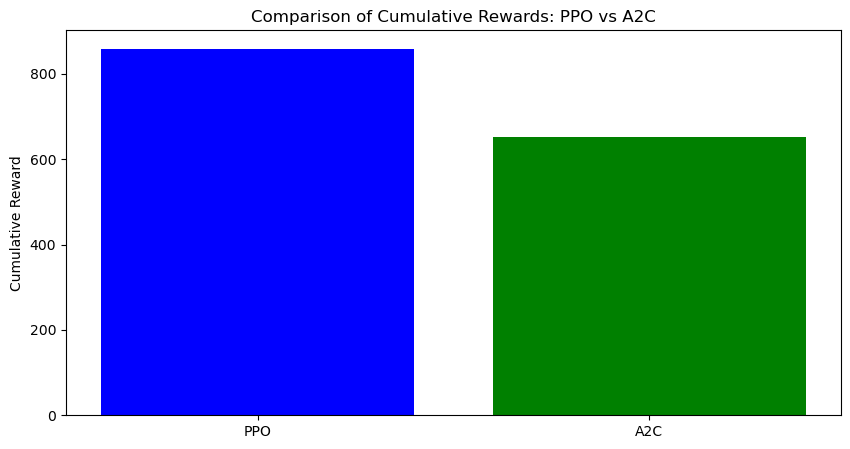

PPO info: {'total_reward': 858.840091999999, 'total_profit': 0.8700740605708486, 'position': <Positions.Long: 1>}
A2C info: {'total_reward': 652.4191870000004, 'total_profit': 0.6499542423347445, 'position': <Positions.Short: 0>}


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import gymnasium as gym
import gym_anytrading

# Custom environment class and signal processing function (Assuming already defined)
class MyCustomEnv(gym_anytrading.envs.StocksEnv):
    _process_data = add_signals  # Assuming add_signals is defined as in your notebook

# Function to add signals (Assuming already defined)
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

# Load and preprocess data
df = pd.read_csv('C:\\Users\\amerb\\Downloads\\^IXIC.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

# Define environments
env_maker_ppo = lambda: MyCustomEnv(df=df, window_size=12, frame_bound=(80, 250))
env_ppo = DummyVecEnv([env_maker_ppo])
env_maker_a2c = lambda: MyCustomEnv(df=df, window_size=12, frame_bound=(80, 250))
env_a2c = DummyVecEnv([env_maker_a2c])

# Train PPO policy
model_ppo = PPO('MlpPolicy', env_ppo, verbose=1)
model_ppo.learn(total_timesteps=100000)

# Train A2C policy
model_a2c = A2C('MlpPolicy', env_a2c, verbose=1)
model_a2c.learn(total_timesteps=100000)

# Function to test a policy and return cumulative rewards
def test_policy(model, env):
    obs = env.reset()
    cumulative_reward = 0
    done = False

    while not done:
        if isinstance(obs, tuple):
            obs_array = obs[0]
        else:
            obs_array = obs

        if obs_array.shape != (12, 5):
            obs_array = obs_array.reshape((12, 5))

        obs_array_batch = obs_array[np.newaxis, ...]

        action, _states = model.predict(obs_array_batch)
        obs, rewards, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        cumulative_reward += rewards

    return cumulative_reward, info

# Test PPO policy
cumulative_reward_ppo, info_ppo = test_policy(model_ppo, env_maker_ppo())
print(f"PPO cumulative reward: {cumulative_reward_ppo}")

# Test A2C policy
cumulative_reward_a2c, info_a2c = test_policy(model_a2c, env_maker_a2c())
print(f"A2C cumulative reward: {cumulative_reward_a2c}")

# Compare the results
labels = ['PPO', 'A2C']
cumulative_rewards = [cumulative_reward_ppo, cumulative_reward_a2c]

plt.figure(figsize=(10, 5))
plt.bar(labels, cumulative_rewards, color=['blue', 'green'])
plt.title('Comparison of Cumulative Rewards: PPO vs A2C')
plt.ylabel('Cumulative Reward')
plt.show()

# Optional: Print info for deeper analysis
print(f"PPO info: {info_ppo}")
print(f"A2C info: {info_a2c}")
